<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%205/Walmart_Sales_Forecasting_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings, os, zipfile
warnings.filterwarnings("ignore")

In [4]:
# Upload ZIP Dataset
from google.colab import files
uploaded = files.upload()  # Upload file ZIP kamu di sini


Saving archive (10).zip to archive (10).zip


In [5]:
# Ekstrak ZIP Dataset
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("walmart_data")

os.listdir("walmart_data")


['train.csv', 'stores.csv', 'test.csv', 'features.csv']

In [6]:
# Load Dataset
features = pd.read_csv('walmart_data/features.csv')
stores = pd.read_csv('walmart_data/stores.csv')
train = pd.read_csv('walmart_data/train.csv')
test = pd.read_csv('walmart_data/test.csv')

# Merge
train_merged = pd.merge(train, features, on=['Store', 'Date'], how='left')
train_merged = pd.merge(train_merged, stores, on='Store', how='left')
train_merged['Date'] = pd.to_datetime(train_merged['Date'])

# Lowercase semua kolom untuk konsistensi
train_merged.columns = train_merged.columns.str.strip().str.lower()


In [7]:
# Rename dan preprocessing kolom isholiday
train_merged.rename(columns={'isholiday_y': 'isholiday'}, inplace=True)
train_merged['isholiday'] = train_merged['isholiday'].astype(int)

# Get dummies kolom 'type'
train_merged = pd.get_dummies(train_merged, columns=['type'])


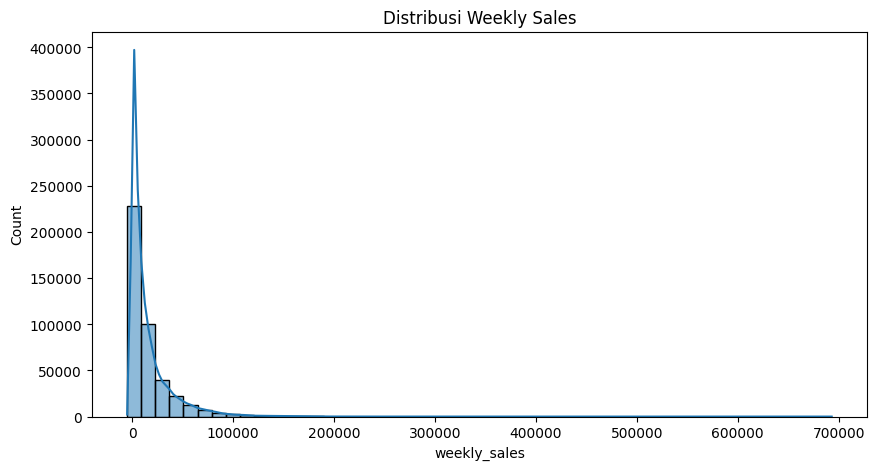

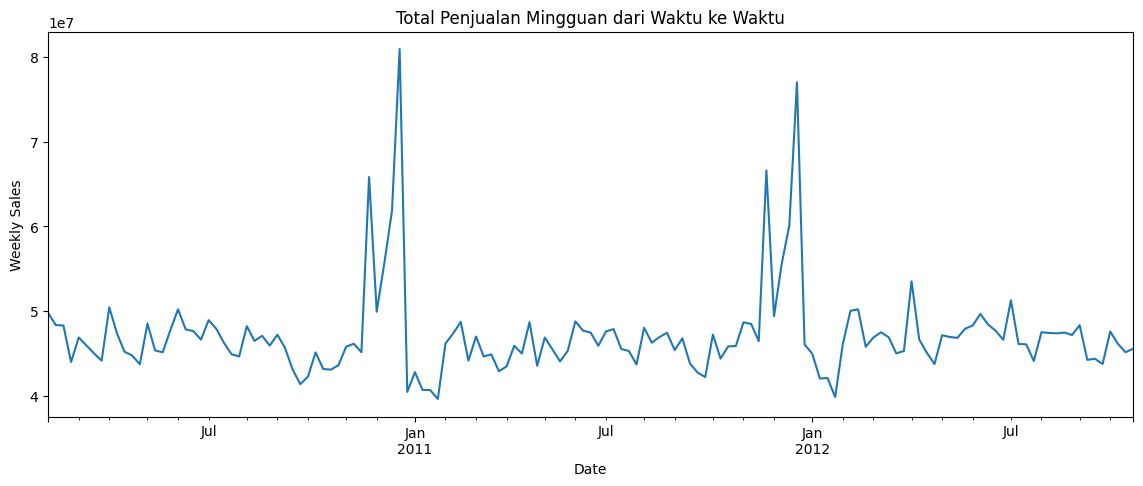

In [8]:
# EDA: Visualisasi
plt.figure(figsize=(10, 5))
sns.histplot(train_merged['weekly_sales'], bins=50, kde=True)
plt.title('Distribusi Weekly Sales')
plt.show()

plt.figure(figsize=(14, 5))
weekly_trend = train_merged.groupby('date')['weekly_sales'].sum()
weekly_trend.plot()
plt.title('Total Penjualan Mingguan dari Waktu ke Waktu')
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.show()


In [9]:
# Fitur dan target
features_cols = ['store', 'dept', 'temperature', 'fuel_price', 'cpi', 'unemployment', 'isholiday', 'size']
type_cols = [col for col in train_merged.columns if col.startswith('type_')]

X = train_merged[features_cols + type_cols].fillna(0)
y = train_merged['weekly_sales']


In [10]:
# Train Model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"📉 MAE: {mae}")
print(f"📉 RMSE: {rmse}")


📉 MAE: 1905.0745815024786
📉 RMSE: 5472.077804848191


### 📘 Penjelasan Evaluasi:
- **MAE (Mean Absolute Error)**: Rata-rata selisih absolut antara nilai prediksi dan aktual.
- **RMSE (Root Mean Squared Error)**: Akar kuadrat rata-rata dari selisih kuadrat prediksi dan aktual.
